<div align="center">
  <img src="https://user-images.githubusercontent.com/58620359/174948746-5dc3418a-8296-4cc8-9561-f8f12ca9a0a4.png" alt="Image Description" width="300" height="200">
</div>

# ⭕ **Problem Description :-**
1. Despite the continuous efforts of banks to attract and retain customers, the banking industry faces a persistent challenge in the form of customer churn, leading to financial losses and reduced customer satisfaction.<br>
2. It is advantageous for banks to know what leads a client towards the decision to leave the company.




# **📊 Inference:**
    
1. **RowNumber:** It is likely a unique identifier for each record and does not contribute directly to the analysis.
2. **CustomerId:** It can be used to track and differentiate individual customers within the dataset.
3. **Surname:** It provides information about the family name of each customer.
4. **CreditScore:** It is a numerical value that assesses the creditworthiness of an individual based on their credit history and financial behavior.
5. **Geography:** It provides information about the customers' geographic distribution, allowing for analysis based on regional or national factors.
6. **Gender:** It categorizes customers as either male or female, enabling gender-based analysis if relevant to the churn prediction.
7. **Age:** It represents the customer's age in years and can be used to analyze age-related patterns and behaviors.
8. **Tenure:** It typically represents the number of years or months the customer has been associated with the bank.
9. **Balance:** It reflects the amount of money in the customer's bank account at a specific point in time.
10. **NumOfProducts:** It can include various offerings such as savings accounts, loans, credit cards, etc.
11. **HasCrCard:** It is a binary variable with a value of 1 if the customer possesses a credit card and 0 otherwise.
12. **IsActiveMember:** It is a binary variable indicating whether the customer is an active member (1) or not (0) within the bank.
13. **EstimatedSalary:** It provides an approximation of the customer's income level, which can be relevant for analyzing churn behavior.
14. **Exited:** It indicates whether a customer has churned (1) or not (0) from the bank. It is the variable we aim to predict using the other features.

# **Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid",font_scale=1.5)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder ,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,BatchNormalization,Dense,Activation

# **Helper Function**

In [2]:
def countplot(column):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column, data=df, hue="Churned",palette="Oranges")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=15)

    plt.title(f"Customer Churned by {column}",fontweight="black",size=20,pad=20)
    plt.show()

In [3]:
def continous_plot(column):
  customize_palette = ['#CD661D','#FFA07A']
  plt.figure(figsize=(13,6))
  sns.histplot(x=column,hue="Churned",data=df,kde=True,palette=customize_palette)
  plt.title(f"Distribution of {column} by Churn Status",fontweight="black",pad=20,size=15)

In [4]:
def plot_confusion_matrix(cm, classes):

    fig, ax = plt.subplots()

    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', ax=ax)

    ax.set_xticklabels(classes, rotation=45)
    ax.set_yticklabels(classes, rotation=0)

    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title('Confusion Matrix')

    plt.show()

# **Loading Data**

In [5]:
df = pd.read_csv('Churn_Modelling.csv')

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 💭 **Basic Understanding Of Data**

In [7]:
print("Total number of Observations present in the dataset is:",df.shape[0])
print("Total number of Features present in the dataset is:",df.shape[1])

Total number of Observations present in the dataset is: 10000
Total number of Features present in the dataset is: 14


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.describe().style.background_gradient(cmap='Oranges')

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

In [10]:
df.isnull().sum().to_frame().rename(columns={0:'Total Num of Missing Values'})

,Total Num of Missing Values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [11]:
df.duplicated().any()

False

- **From the previous there is no either duplicated data or missing values**

In [12]:
df.describe(include='O')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


# ❌ **Dropping Insignificant Features**

In [13]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4038,4039,15684461,McKay,469,Spain,Female,31,6,0.00,1,1,0,146213.75,1
56,57,15630053,Tsao,656,France,Male,45,5,127864.40,1,1,0,87107.57,0
4996,4997,15620341,Nwebube,500,Germany,Male,44,9,160838.13,2,1,0,196261.64,0
9322,9323,15739042,Bogolyubov,767,France,Female,35,9,0.00,2,1,0,39511.61,0
9325,9326,15786389,Chuang,635,Spain,Female,41,10,0.00,2,1,1,61994.20,0


- **RowNumber** and **CustomerId** columns represents a unique value for each customer and doesn't seem relevant for predicting customer churned or not.

- **Surname** column is having **high cardinality and doesn't seems relevant for predicting customer churned or not.**

- So we can simply drop these features.

In [14]:
df.drop(columns=['RowNumber','CustomerId','Surname'] , inplace=True)

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Exploratory Data Analysis**

In [16]:
df.rename(columns={'Exited':'Churned'},inplace=True)

In [17]:
df["Churned"].replace({0:"No",1:"Yes"},inplace=True)

- Renaming Target Column name and its values with more appropirate values for better Analysis.

In [18]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No


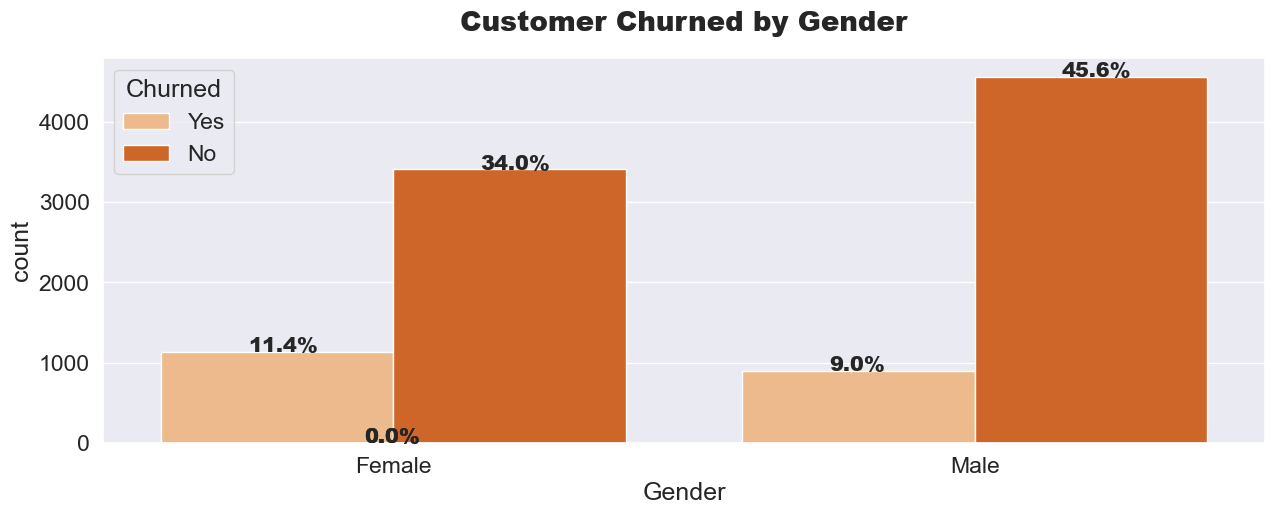

In [19]:
countplot('Gender')

- **female customers** are more deactivating their banking facilities compared to **male customers**.

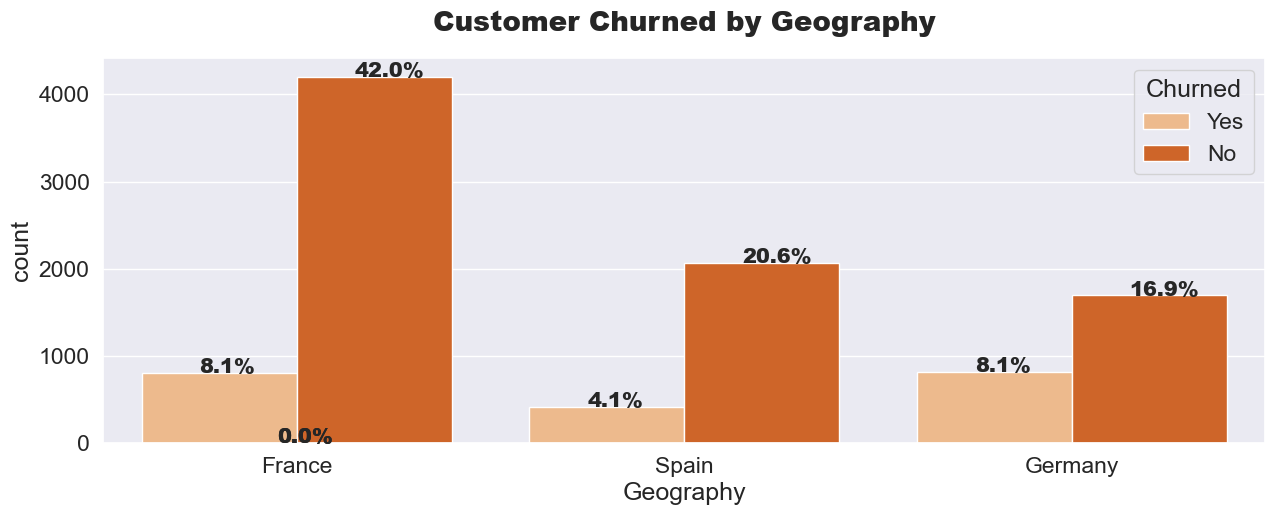

In [20]:
countplot('Geography')

- Despite of the huge total customers difference between France & Germany the churned rate for France and Germany customers are same.

- There are almost equal customers from Spain & Germany, but the Churn rate is almost double in Germany when compared with spain.

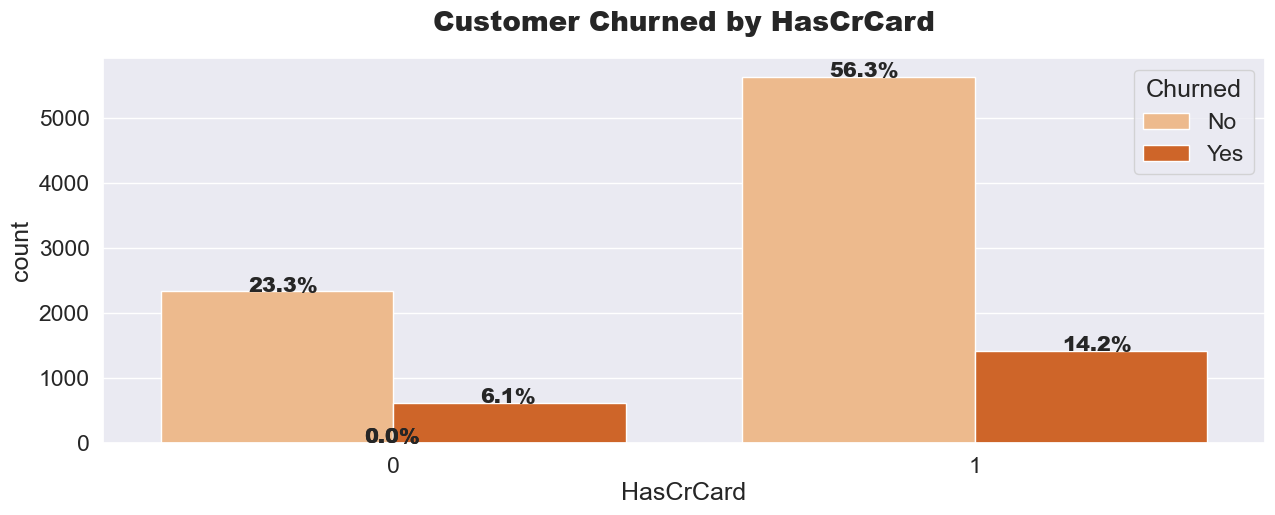

In [21]:
countplot('HasCrCard')

- More than 70% of customers are having credit card.

- The churn probability value for the both the categories is almost 1:4.

- So credit card is not affecting the churn of customers.


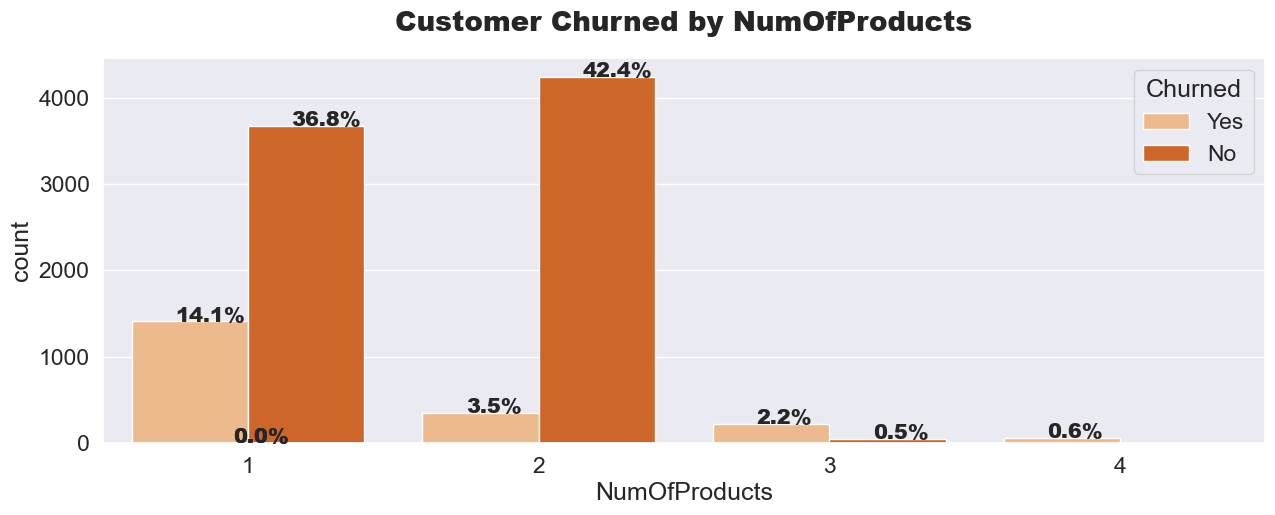

In [22]:
countplot('NumOfProducts')

- Most of the customers are having either 1 or 2 total number of banking products.

- Very few customers are having more than 2 total number of banking products.

- The lowest churn rate is with customers having only 2 products.

- There is very high churn rate in customers having 1 product or more than 2 products.

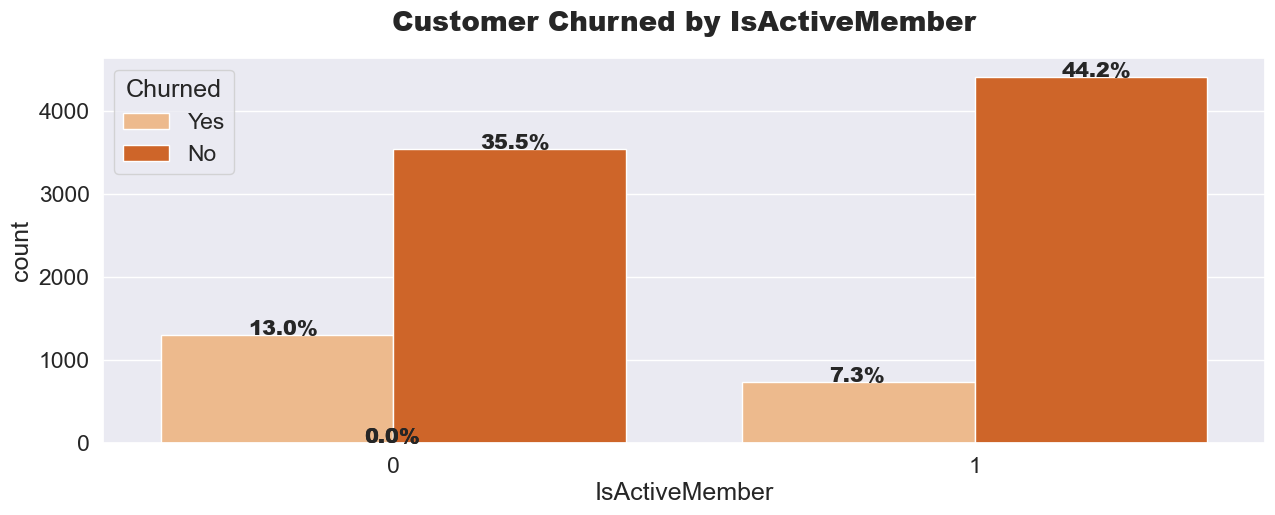

In [23]:
countplot('IsActiveMember')

- There is approxiamately equal customer who are either active or not active.

- But the churn rate % in not active customers is almost double compared to active customers.

- So customers which are not active are morely likely to deactivate their banking facilities.


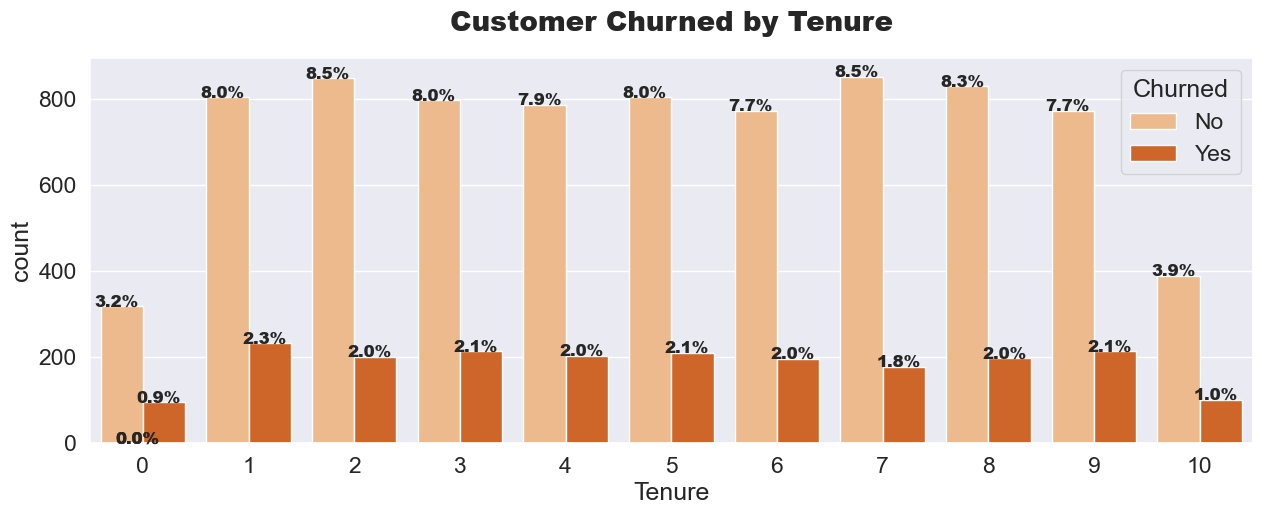

In [24]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="Tenure", data=df, hue="Churned",palette="Oranges")
for value in ax.patches:
    percentage = "{:.1f}%".format(100*value.get_height()/len(df["Tenure"]))
    x = value.get_x() + value.get_width() / 2 - 0.05
    y = value.get_y() + value.get_height()
    ax.annotate(percentage, (x,y), fontweight="black",size=12, ha="center")

plt.title("Customer Churned by Tenure",fontweight="black",size=20,pad=20)
plt.show()

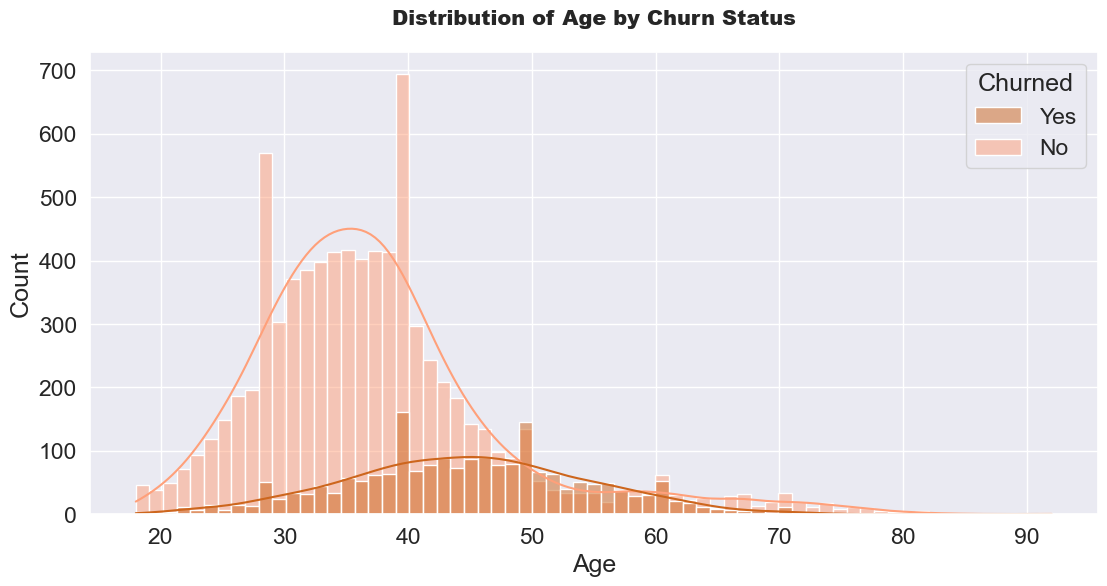

In [25]:
continous_plot("Age")

-

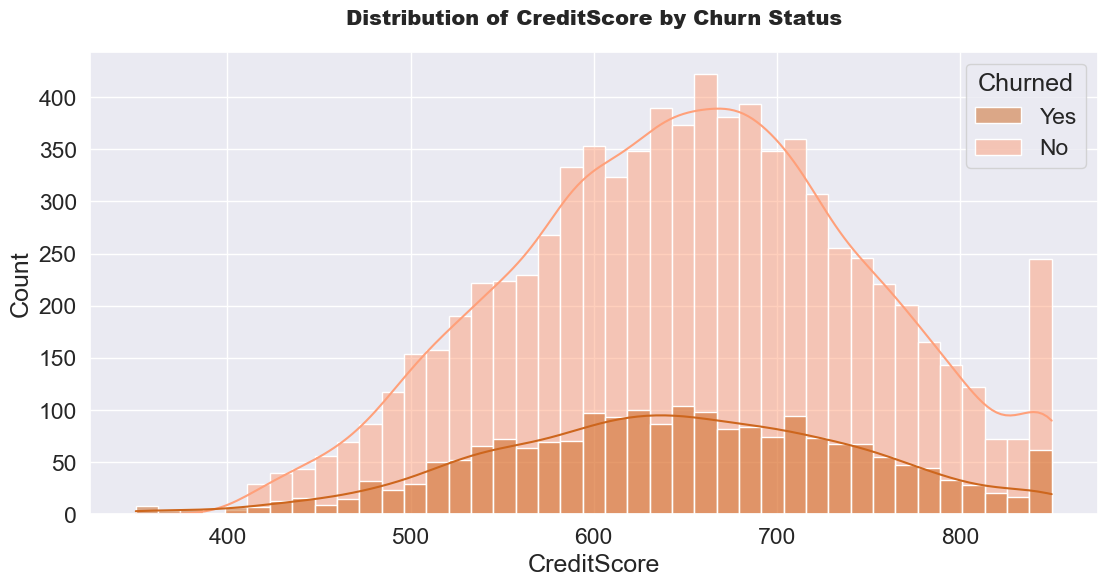

In [26]:
continous_plot("CreditScore")

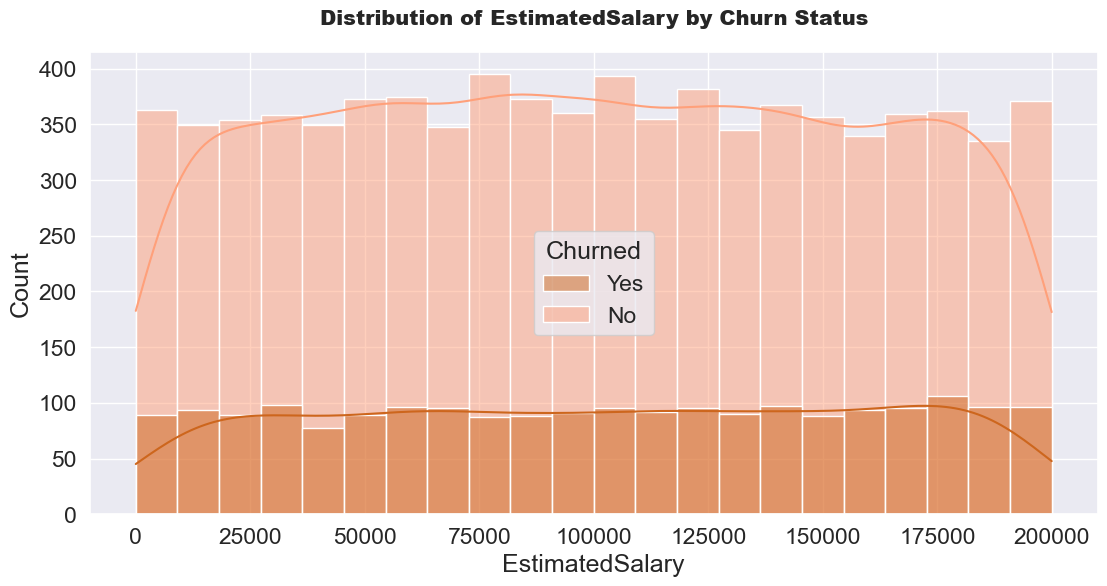

In [27]:
continous_plot("EstimatedSalary")

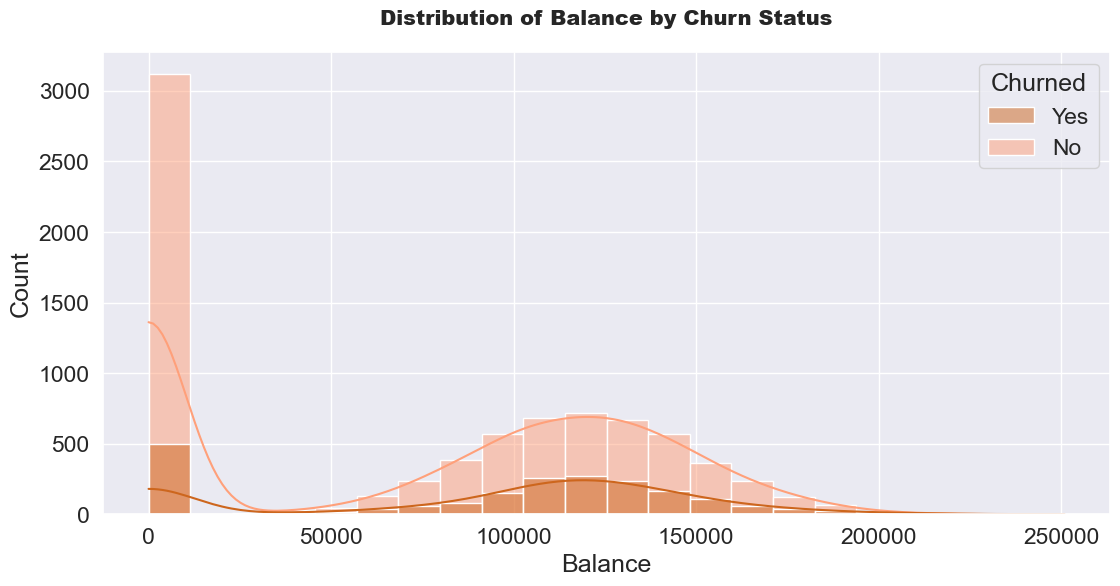

In [28]:
continous_plot("Balance")

# **Preprocessing**

## **Encoding**

In [29]:
encoder = OneHotEncoder()

In [30]:
columns_to_encode = ['Geography', 'Gender']

In [31]:
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(df[columns_to_encode])

In [32]:
encoded_column_names = []
for i, column in enumerate(columns_to_encode):
    categories = encoder.categories_[i]
    encoded_column_names.extend([column + '_' + str(category) for category in categories])

In [33]:
df.drop(columns_to_encode, axis=1, inplace=True)
df[encoded_column_names] = encoded_columns

In [34]:
le = LabelEncoder()

In [35]:
df["Churned"] = le.fit_transform(df["Churned"])

In [36]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0


## **Checking Skewness of Continous Features**

In [37]:
cols = ["CreditScore","Age","EstimatedSalary","Balance"]

In [38]:
df[cols].skew().to_frame().rename(columns={0:"Feature Skewness"})

,Feature Skewness
CreditScore,-0.071607
Age,1.011320
EstimatedSalary,0.002085
Balance,-0.141109


- Age Feature is highly right-skewed , which conveys that there is presence of positive outliers.

- To overcome the right-skewed distribution we can use log normal transformation to achieve a normal distribution.

## **Handling Outliers**

In [39]:
old_age = df["Age"]

In [40]:
df["Age"] = np.log(df["Age"])

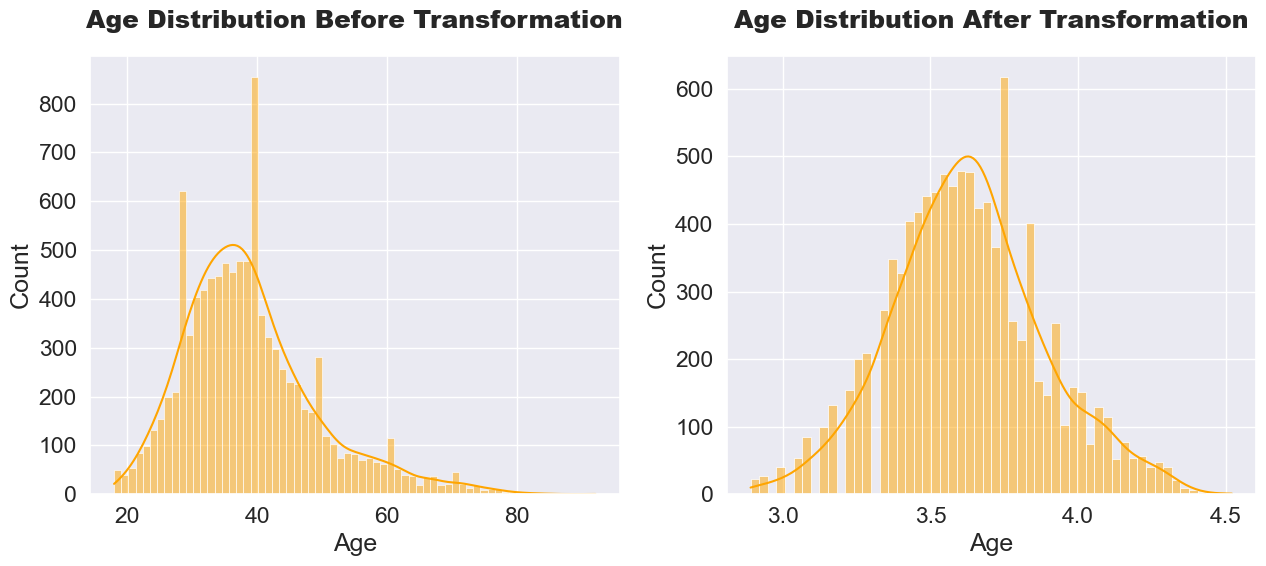

In [41]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(old_age, color="orange", kde=True)
plt.title("Age Distribution Before Transformation",fontweight="black",size=18,pad=20)

plt.subplot(1,2,2)
sns.histplot(df["Age"], color="orange", kde=True)
plt.title("Age Distribution After Transformation",fontweight="black",size=18,pad=20)
plt.tight_layout()
plt.show()

- After applying log normal transformation the age feature has achieved a normal distribution.

## **Standardisation**

In [42]:
sc1=StandardScaler()
sc2=StandardScaler()
sc3=StandardScaler()
sc4=StandardScaler()

In [43]:
df["CreditScore"] = sc1.fit_transform(df[["CreditScore"]])
df["Age"] = sc2.fit_transform(df[["Age"]])
df["Balance"] = sc3.fit_transform(df[["Balance"]])
df["EstimatedSalary"] = sc4.fit_transform(df[["EstimatedSalary"]])

In [44]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.425883,2,-1.225848,1,1,1,0.021886,1,1.0,0.0,0.0,1.0,0.0
1,-0.440036,0.332621,1,0.117350,1,0,1,0.216534,0,0.0,0.0,1.0,1.0,0.0
2,-1.536794,0.425883,8,1.333053,3,1,0,0.240687,1,1.0,0.0,0.0,1.0,0.0
3,0.501521,0.139072,1,-1.225848,2,0,0,-0.108918,0,1.0,0.0,0.0,1.0,0.0
4,2.063884,0.516950,2,0.785728,1,1,1,-0.365276,0,0.0,0.0,1.0,1.0,0.0


## **Splitting**

In [45]:
X = df.drop(columns=["Churned"] , axis=1 )
y = df["Churned"]

In [46]:
print(X.columns)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')


In [47]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

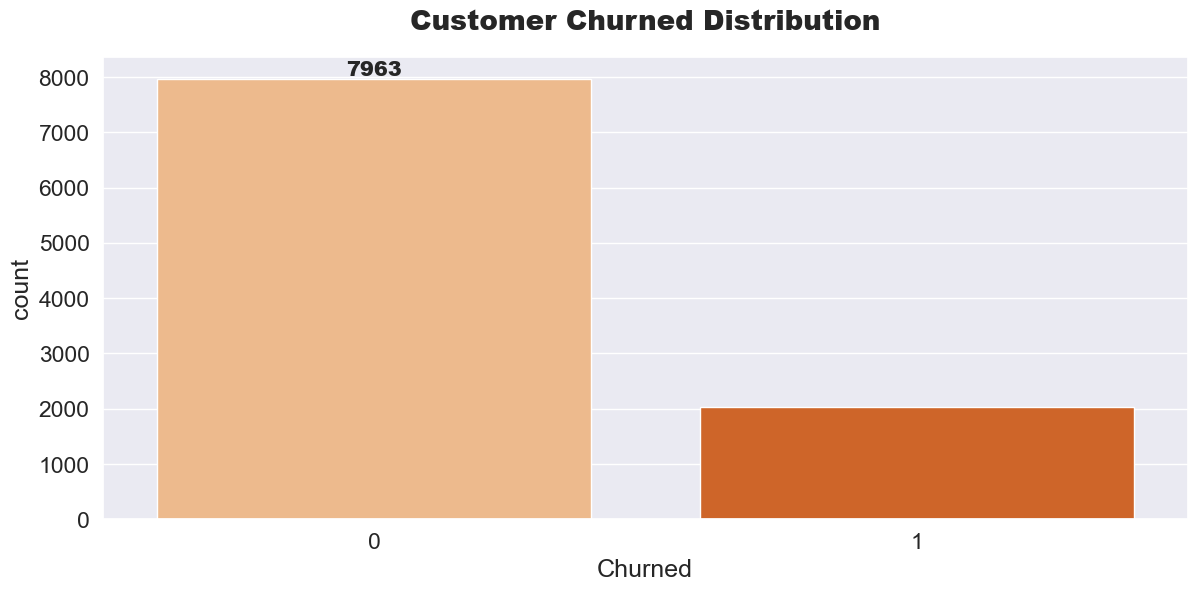

In [48]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(data=df, x='Churned', palette='Oranges')
ax.bar_label(ax.containers[0], fontweight='black', size=15)
plt.title('Customer Churned Distribution', fontweight='black', size=20, pad=20)

plt.show()

In [49]:
under_sampler = RandomUnderSampler(random_state=42)

In [50]:
x_train_under, y_train_under = under_sampler.fit_resample(x_train, y_train)

In [51]:
print("Class distribution after under-sampling:")
print(Counter(y_train_under))

Class distribution after under-sampling:
Counter({0: 1644, 1: 1644})


# **Building ANN Model**

In [52]:
model=Sequential()

In [53]:
model.add(Dense(units=30, activation='relu', kernel_initializer='he_normal'))

# Hidden Layers
model.add(Dense(units=300, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(units=100, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(units=50, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Output Layer
model.add(Dense(units=1, activation='sigmoid'))

In [54]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics='accuracy')

In [56]:
model.fit(x=x_train,y=y_train,epochs=200,validation_data=(x_test,y_test))

Epoch 1/200
  1/250 [..............................] - ETA: 1s - loss: 0.3923 - accuracy: 0.8438

250/250 [==============================] - 1s 4ms/step - loss: 0.2843 - accuracy: 0.8829 - val_loss: 0.4055 - val_accuracy: 0.8585
Epoch 2/200
250/250 [==============================] - 1s 4ms/step - loss: 0.2869 - accuracy: 0.8789 - val_loss: 0.4102 - val_accuracy: 0.8620
Epoch 3/200
250/250 [==============================] - 1s 4ms/step - loss: 0.2863 - accuracy: 0.8840 - val_loss: 0.4090 - val_accuracy: 0.8620
Epoch 4/200
250/250 [==============================] - 1s 4ms/step - loss: 0.2877 - accuracy: 0.8791 - val_loss: 0.4011 - val_accuracy: 0.8575
Epoch 5/200
250/250 [==============================] - 1s 5ms/step - loss: 0.2870 - accuracy: 0.8831 - val_loss: 0.3989 - val_accuracy: 0.8590
Epoch 6/200
250/250 [==============================] - 1s 4ms/step - loss: 0.2809 - accuracy: 0.8836 - val_loss: 0.4143 - val_accuracy: 0.8595
Epoch 7/200
250/250 [==============================] - 1s 4ms/step - loss: 0.2864 - accuracy: 0.8825 - val_loss: 0.4060 - val_accuracy: 0.8585
Epoch 8/200

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                420       
                                                                 
 dense_1 (Dense)             (None, 300)               9300      
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 batch_normalization (Batch  (None, 300)               1200      
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                        

In [ ]:
model_loss=pd.DataFrame(model.history.history)


In [ ]:
model_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.590811,0.702375,0.438265,0.8060
1,0.493882,0.778500,0.428038,0.8105
2,0.471829,0.791375,0.418088,0.8140
3,0.449468,0.800125,0.412076,0.8180
4,0.443861,0.803000,0.404656,0.8260


<Axes: >

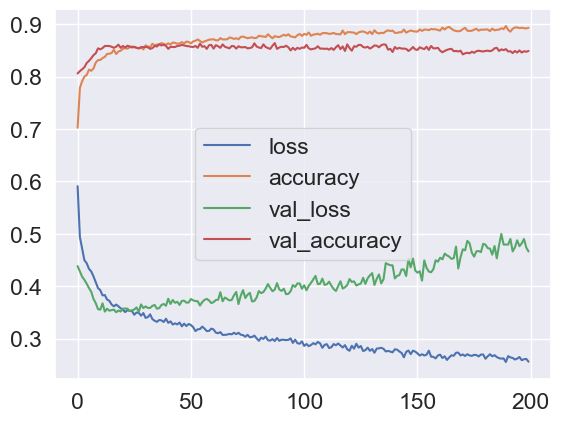

In [ ]:
model_loss.plot()

<Axes: >

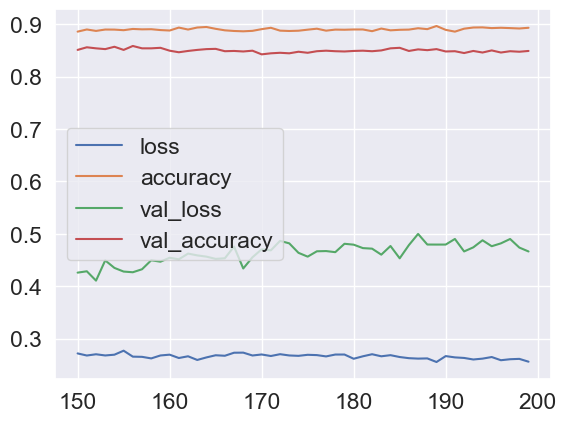

In [ ]:
model_loss.tail(50).plot()

In [ ]:
predictions=model.predict(x_test)

63/63 [==============================] - 0s 721us/step


In [ ]:
ypred= (model.predict(x_test) > 0.5).astype("int32")

63/63 [==============================] - 0s 614us/step


In [ ]:
cm=confusion_matrix(ypred,y_test)
classes = ['Not Churn', 'Churn']

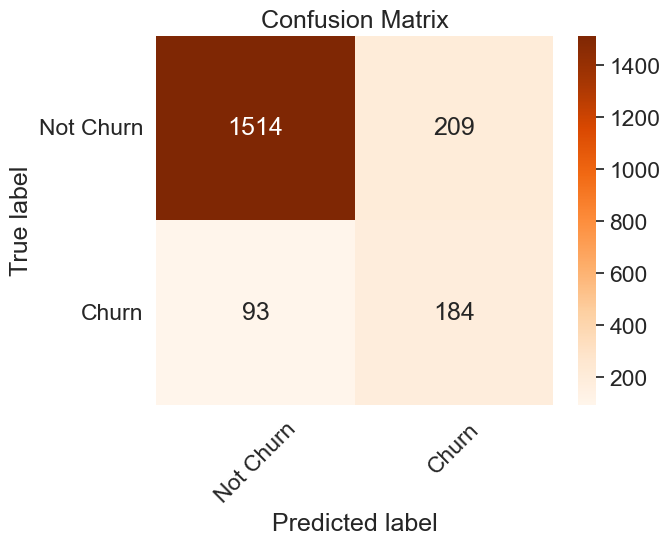

In [ ]:
plot_confusion_matrix(cm, classes)

In [ ]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1607
           1       0.66      0.47      0.55       393

    accuracy                           0.85      2000
   macro avg       0.77      0.71      0.73      2000
weighted avg       0.84      0.85      0.84      2000



In [57]:
new_customer_data = {
    'CreditScore': 100,
    'Age': 90,
    'Tenure': 0.5,
    'Balance': 60,
    'NumOfProducts': 0,
    'HasCrCard': 1,  # 1 for "Yes," 0 for "No"
    'IsActiveMember': 1,  # 1 for "Yes," 0 for "No"
    'EstimatedSalary': 500,
    'Geography_France': 0,  # 1 for "Yes," 0 for "No"
    'Geography_Germany': 1,
    'Geography_Spain': 0,
    'Gender_Female': 1,
    'Gender_Male': 0  # 1 for "Yes," 0 for "No"
}

# Create a DataFrame from the dictionary
new_customer_df = pd.DataFrame([new_customer_data])

# Use the trained model to make predictions for the new customer
prediction = model.predict(new_customer_df)

# Print the prediction
if prediction[0] == 1:
    print("The customer is likely to leave the bank.")
else:
    print("The customer is likely to stay with the bank.")

1/1 [==============================] - 0s 292ms/step
The customer is likely to leave the bank.


In [ ]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame named 'data'
data = pd.DataFrame({
    'CreditScore': [619, 608, 502, 699],
    'Age': [42, 41, 42, 39],
    'Tenure': [2, 1, 8, 1],
    'Balance': [0.00, 83807.86, 159660.80, 0.00],
    'NumOfProducts': [1, 1, 3, 2],
    'HasCrCard': [1, 0, 1, 0],
    'IsActiveMember': [1, 1, 0, 0],
    'EstimatedSalary': [101348.88, 112542.58, 113931.57, 93826.63],
    'Geography_France': [1.0, 0.0, 1.0, 1.0],
    'Geography_Germany': [0.0, 0.0, 0.0, 0.0],
    'Geography_Spain': [0.0, 1.0, 0.0, 0.0],
    'Gender_Female': [1.0, 1.0, 1.0, 1.0],
    'Gender_Male': [0.0, 0.0, 0.0, 0.0],
    'Churned': [1, 0, 1, 0]  # The target variable (Churned)
})

# Select rows from the dataset to use as test cases
test_cases = data.iloc[:, :-1]  # Exclude the target variable (Churned)

# Assuming you have a trained model named 'model'
predictions = model.predict(test_cases)

# Print the predictions for the test cases
for i, prediction in enumerate(predictions):
    if prediction == 1:
        print(f"Test case {i + 1}: The customer is likely to leave the bank.")
    else:
        print(f"Test case {i + 1}: The customer is likely to stay with the bank.")


1/1 [==============================] - 0s 12ms/step
Test case 1: The customer is likely to stay with the bank.
Test case 2: The customer is likely to stay with the bank.
Test case 3: The customer is likely to stay with the bank.
Test case 4: The customer is likely to stay with the bank.


In [58]:
import json

def export_json_to_file(data_dict, filename):
    # Convert keys to lowercase and create a JSON string
    json_str = json.dumps({key.lower(): value for key, value in data_dict.items()})
    
    # Write the JSON string to the specified file
    with open(filename, 'w') as file:
        file.write(json_str)

# Example usage:
customer_data = {
    "CreditScore": 100,
    "Age": 90,
    "Tenure": 0.5,
    "Balance": 60,
    "NumOfProducts": 0,
    "HasCrCard": 1,
    "IsActiveMember": 1,
    "EstimatedSalary": 500,
    "Geography_France": 0,
    "Geography_Germany": 1,
    "Geography_Spain": 0,
    "Gender_Female": 1,
    "Gender_Male": 0
}

# Export the customer data to a JSON file with lowercase keys
export_json_to_file(customer_data, 'customer_data.json')


In [60]:
import pickle
model_filename = 'ANN.pkl'  # Replace with the desired filename
with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)

In [63]:
with open('ANN.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [74]:
def predict_Churn_from_json(model, json_file):
    # Read the input JSON file
    with open(json_file, 'r') as file:
        customer_data = json.load(file)

    # Convert the keys to lowercase
    customer_data_lower = {key.lower(): value for key, value in customer_data.items()}

    # Create a DataFrame from the customer_data dictionary
    new_customer_df = pd.DataFrame([customer_data_lower])

    # Use the trained model to make predictions for the new customer
    prediction = model.predict(new_customer_df)

    # Return the prediction as a string
    return "The customer is likely to stay with the bank." if prediction[0] == 0 else "The customer is likely to leave the bank."

In [79]:
result = predict_Churn_from_json(loaded_model, 'customer_data.json')
print(result)

1/1 [==============================] - 0s 25ms/step
The customer is likely to leave the bank.


import joblib

# Assuming 'model' is your trained model
# Save the model to a file
joblib.dump(model, 'trained_model.pkl')


import pickle
import tensorflow as tf
from tensorflow import keras


# Load the Keras model
loaded_model = keras.models.load_model('trained_model.h5')

# Now, you can use loaded_model for predictions
prediction = loaded_model.predict(new_customer_df)

import numpy as np

# Define your new customer's data as a NumPy array
new_customer_data = np.array([
    [400, 60, 0.5, 600, 0, 1, 1, 50000, 0, 1, 0, 1, 0]
])

# Use the loaded model to make predictions
predictions = loaded_model.predict(new_customer_data)

# The 'predictions' variable now contains the model's output, which you can interpret
# based on your specific use case. For binary classification, you can check if the
# prediction is above a certain threshold (e.g., 0.5) to determine the class.

if predictions[0] > 0.5:
    print("The customer is likely to leave the bank.")
else:
    print("The customer is likely to stay with the bank.")
